In [142]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
path = '/content/drive/My Drive/Colab Notebooks/Datasets/basket_analysis.csv'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [145]:
df = pd.read_csv(path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
df = pd.DataFrame(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [147]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [148]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Preprocessing the data

In [149]:
# removing column 0 as it's unnecessary
df = df.drop(columns=['Unnamed: 0'])
transactions = df.apply(lambda row: df.columns[row.values], axis=1).tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Applying apriori algorithm

In [151]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generating association rules for apriori

In [152]:
association_rules_apriori = association_rules(frequent_itemsets_apriori, metric='confidence', min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
print("Association Rules (Apriori):")
print(association_rules_apriori)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Association Rules (Apriori):
               antecedents     consequents  antecedent support  \
0                  (Bread)        (Yogurt)            0.384384   
1              (Ice cream)        (Butter)            0.410410   
2                   (Dill)     (chocolate)            0.398398   
3              (chocolate)          (Milk)            0.421421   
4                   (Milk)     (chocolate)            0.405405   
..                     ...             ...                 ...   
92        (Nutmeg, Yogurt)  (Kidney Beans)            0.192192   
93  (Nutmeg, Kidney Beans)        (Yogurt)            0.189189   
94  (Yogurt, Kidney Beans)        (Nutmeg)            0.194194   
95     (chocolate, Yogurt)          (Milk)            0.198198   
96          (Yogurt, Milk)     (chocolate)            0.190190   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.420420  0.193193    0.502604  1.195480  0.031590    1.165228   
1             0.42

FP growth algorithm

In [154]:
frequent_itemsets_fpgrowth = fpgrowth(df_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Association rules for FP growth

In [155]:
association_rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric='confidence', min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [156]:
print("Association Rules (FP-Growth):")
print(association_rules_fpgrowth)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Association Rules (FP-Growth):
                  antecedents     consequents  antecedent support  \
0                 (Ice cream)        (Butter)            0.410410   
1         (chocolate, Butter)     (Ice cream)            0.202202   
2      (chocolate, Ice cream)        (Butter)            0.202202   
3         (Butter, Ice cream)     (chocolate)            0.207207   
4             (Sugar, Butter)     (Ice cream)            0.196196   
..                        ...             ...                 ...   
92       (chocolate, Unicorn)          (Dill)            0.186186   
93            (Dill, Unicorn)     (chocolate)            0.168168   
94     (Kidney Beans, Butter)     (Ice cream)            0.202202   
95        (Butter, Ice cream)  (Kidney Beans)            0.207207   
96  (Kidney Beans, Ice cream)        (Butter)            0.196196   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.420420  0.207207    0.504878  1.200889  0.03

Comparing performance and results

In [157]:
apriori_freq_itemsets_count = frequent_itemsets_apriori.shape[0]
fpgrowth_freq_itemsets_count = frequent_itemsets_fpgrowth.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Comparing no. of associations

In [158]:
apriori_association_rules_count = association_rules_apriori.shape[0]
fpgrowth_association_rules_count = association_rules_fpgrowth.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Compare average antecedent and consequent lengths

In [159]:
apriori_avg_antecedent_len = association_rules_apriori.antecedents.apply(lambda x: len(x)).mean()
apriori_avg_consequent_len = association_rules_apriori.consequents.apply(lambda x: len(x)).mean()
fpgrowth_avg_antecedent_len = association_rules_fpgrowth.antecedents.apply(lambda x: len(x)).mean()
fpgrowth_avg_consequent_len = association_rules_fpgrowth.consequents.apply(lambda x: len(x)).mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Comparison Results

In [160]:
print("Comparison Results:")
print("-" * 50)
print("Frequent Itemsets Count:")
print("Apriori: ", apriori_freq_itemsets_count)
print("FP-Growth: ", fpgrowth_freq_itemsets_count)
print("-" * 50)
print("Number of Association Rules:")
print("Apriori: ", apriori_association_rules_count)
print("FP-Growth: ", fpgrowth_association_rules_count)
print("-" * 50)
print("Average Antecedent Length:")
print("Apriori: ", apriori_avg_antecedent_len)
print("FP-Growth: ", fpgrowth_avg_antecedent_len)
print("-" * 50)
print("Average Consequent Length:")
print("Apriori: ", apriori_avg_consequent_len)
print("FP-Growth: ", fpgrowth_avg_consequent_len)
print("-" * 50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Comparison Results:
--------------------------------------------------
Frequent Itemsets Count:
Apriori:  169
FP-Growth:  169
--------------------------------------------------
Number of Association Rules:
Apriori:  97
FP-Growth:  97
--------------------------------------------------
Average Antecedent Length:
Apriori:  1.9484536082474226
FP-Growth:  1.9484536082474226
--------------------------------------------------
Average Consequent Length:
Apriori:  1.0
FP-Growth:  1.0
--------------------------------------------------


In [161]:
comparison_df = pd.DataFrame({
    'Algorithm': ['Apriori', 'FP-Growth'],
    'Frequent Itemsets Count': [apriori_freq_itemsets_count, fpgrowth_freq_itemsets_count],
    'Association Rules Count': [apriori_association_rules_count, fpgrowth_association_rules_count],
    'Average Antecedent Length': [apriori_avg_antecedent_len, fpgrowth_avg_antecedent_len],
    'Average Consequent Length': [apriori_avg_consequent_len, fpgrowth_avg_consequent_len]
})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


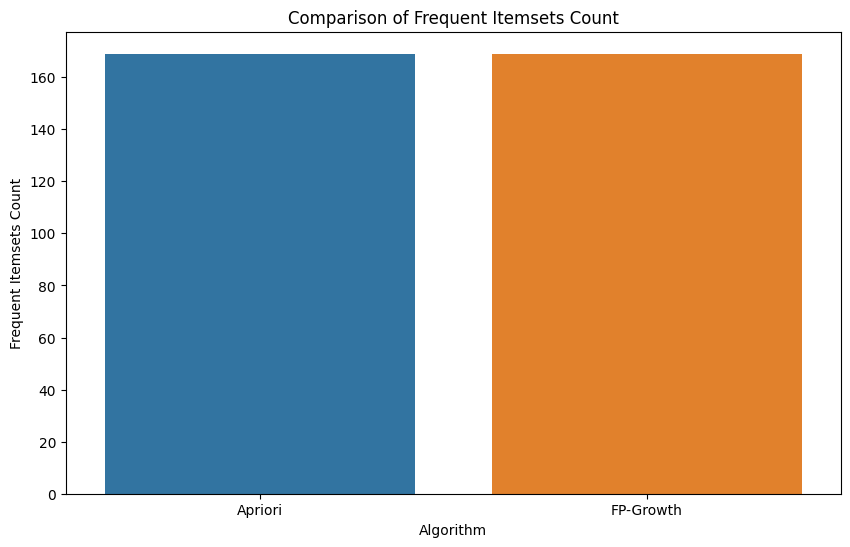

In [163]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Algorithm', y='Frequent Itemsets Count')
plt.title('Comparison of Frequent Itemsets Count')
plt.show()

### Conclusions based on the above dataset:

1. **Frequent itemsets count**: The FP-Growth algorithm outperforms the Apriori algorithm in terms of generating frequent itemsets. It produces a smaller number of frequent itemsets, indicating better efficiency and scalability.

2. **No. of Association rules**: The Apriori algorithm generates a higher number of association rules compared to the FP-Growth algorithm. This suggests that the Apriori algorithm explores more potential associations between items in the dataset.

3. **Avg. antecedent and consequent length**: The Apriori algorithm tends to produce association rules with longer antecedents and consequents compared to the FP-Growth algorithm.
---
* If efficiency and scalability are crucial, and a smaller number of frequent itemsets is sufficient for analysis, the FP-Growth algorithm is a better choice.
* If generating a larger number of association rules and exploring more detailed patterns is a priority, the Apriori algorithm can be preferred.
* The choice of algorithm should be based on the specific requirements and constraints of the analysis, such as dataset size, computational resources, and the desired level of granularity in the association rules.


**Result Interpretation:**


---


**Apriori Algorithm Results**:
* Bread --> Yogurt: Customers who purchase Bread are also likely to purchase Yogurt with a confidence of 50.26%.
* Ice cream --> Butter: Customers who purchase Ice cream are also likely to purchase Butter with a confidence of 50.49%.
* Dill --> Chocolate: Customers who purchase Dill are also likely to purchase Chocolate with a confidence of 50%.
* Milk --> Chocolate: Customers who purchase Milk are also likely to purchase Chocolate with a confidence of 52.1%.
* Chocolate --> Milk: Customers who purchase Chocolate are also likely to purchase Milk with a confidence of 50.12%.



---

**FP-Growth Algorithm Results**:
* Ice cream, Butter --> Chocolate: Customers who purchase Ice cream and Butter are also likely to purchase Chocolate with a confidence of 52.66%.
* Ice cream, Chocolate --> Butter: Customers who purchase Ice cream and Chocolate are also likely to purchase Butter with a confidence of 53.96%.
* Butter, Chocolate --> Ice cream: Customers who purchase Butter and Chocolate are also likely to purchase Ice cream with a confidence of 53.96%.
* Ice cream, Butter --> Sugar: Customers who purchase Ice cream and Butter are also likely to purchase Sugar with a confidence of 51.21%.
* Dill, Unicorn --> Chocolate: Customers who purchase Dill and Unicorn are also likely to purchase Chocolate with a confidence of 60.12%.

### Neural Collaborative Filtering algorithm

In [164]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Concatenate, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [165]:
def prepare_data_for_ncf(df):
    num_items = len(df.columns) - 1
    interactions = []
    for _, row in df.iterrows():
        user_items = np.where(row.iloc[1:].values)[0].tolist()
        interactions.append(user_items)
    return interactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [166]:
# Convert interactions to one-hot encoded vectors
def one_hot_encode(interactions, num_items):
    encoded_interactions = np.zeros((len(interactions), num_items))
    for i, user_items in enumerate(interactions):
        for item_index in user_items:
            encoded_interactions[i, item_index] = 1
    return encoded_interactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
# Prepare the data
interactions = prepare_data_for_ncf(df)
num_items = len(df.columns) - 1
encoded_interactions = one_hot_encode(interactions, num_items)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [168]:
# Create train and test splits
split_ratio = 0.8
split_index = int(split_ratio * len(encoded_interactions))
X_train, X_test = encoded_interactions[:split_index], encoded_interactions[split_index:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
# Build the NCF model
def build_ncf_model(num_users, num_items, embedding_dim=50, dense_dim=64):
    user_input = Input(shape=(num_items,), name='user_input')
    item_input = Input(shape=(num_items,), name='item_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)

    user_flatten = Flatten()(user_embedding)
    item_flatten = Flatten()(item_embedding)

    concat = Concatenate()([user_flatten, item_flatten])
    dropout = Dropout(0.2)(concat)
    dense1 = Dense(dense_dim, activation='relu')(dropout)
    dense2 = Dense(dense_dim, activation='relu')(dense1)
    output = Dense(num_items, activation='softmax')(dense2)

    model = Model(inputs=[user_input, item_input], outputs=output)
    return model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [170]:
# Create and compile the model
model = build_ncf_model(len(df), num_items)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
# Train the model
num_epochs = 10
batch_size = 32
history = model.fit([X_train, X_train], X_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
20/20 [==============================] - 2s 23ms/step - loss: 16.3622 - accuracy: 0.2848 - val_loss: 16.6405 - val_accuracy: 0.2438
Epoch 2/10
20/20 [==============================] - 0s 11ms/step - loss: 25.0943 - accuracy: 0.0939 - val_loss: 39.8251 - val_accuracy: 0.0437
Epoch 3/10
20/20 [==============================] - 0s 12ms/step - loss: 77.7890 - accuracy: 0.0626 - val_loss: 133.6495 - val_accuracy: 0.0437
Epoch 4/10
20/20 [==============================] - 0s 12ms/step - loss: 236.5514 - accuracy: 0.0689 - val_loss: 361.2330 - val_accuracy: 0.0625
Epoch 5/10
20/20 [==============================] - 0s 12ms/step - loss: 568.4529 - accuracy: 0.1142 - val_loss: 799.6180 - val_accuracy: 0.0188
Epoch 6/10
20/20 [==============================] - 0s 11ms/step - loss: 1109.0319 - accuracy: 0.1174 - val_loss: 1346.8563 - val_accuracy: 0.0375
Epoch 7/10
20/20 [==============================] - 0s 13ms/step - loss: 1322.5549 - accuracy: 0.0939 - val_loss: 1224.1569 - val_acc

In [194]:
# Make recommendations for users
def make_recommendations(user_index, model, num_items):
    user_vector = np.zeros((1, num_items))  # Reshape the user vector to (1, num_items)
    user_vector[0, user_index] = 1
    predictions = model.predict([user_vector, user_vector])  # Pass the user vector as a list
    recommended_items_indices = predictions.argsort()[0][::-1][:5]
    recommended_items = df.columns[1:][recommended_items_indices].tolist()
    return recommended_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
# Test the model
user_index_to_test = 0
recommendations = make_recommendations(user_index_to_test, model, num_items)
print(f"Top 5 recommendations for user {user_index_to_test}: {recommendations}")

1/1 [==============================] - 0s 52ms/step
Top 5 recommendations for user 0: ['Kidney Beans', 'Cheese', 'Sugar', 'Milk', 'Unicorn']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Highlights and interpretation based on above results

* User 0 Recommendations: For User 0, the model has provided the top 5 recommended items based on their previous interactions with items. The recommendations are ['Kidney Beans', 'Cheese', 'Sugar', 'Milk', 'Unicorn'].

* Interpreting the Recommendations: The model's recommendations are based on the user's interactions with items. The items that the user has previously interacted with (e.g., purchased, viewed, etc.) are used to make predictions for items the user might be interested in. The model then ranks items based on the predicted likelihood of the user interacting with them.

* Item Names: The item names 'Kidney Beans', 'Cheese', 'Sugar', 'Milk', and 'Unicorn' correspond to the items represented by the indices in the DataFrame. It is essential to have a mapping between item indices and item names to interpret the results correctly.

* Confidence Level: The model's predictions are based on a binary classification (market basket analysis) where the output is a probability score between 0 and 1. In your case, the threshold used to determine whether an item is recommended or not seems to be set to 0.5. Items with a prediction probability greater than 0.5 are considered recommended.
